In [81]:
import numpy as np,  pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [104]:
plantas = pd.read_excel('plantas_intermitentes_clean.xlsx', header=1)
plantas.head()

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
0,1,jueves,2013-11-14,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 01:00:00
1,2,jueves,2013-11-14,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 02:00:00
2,3,jueves,2013-11-14,3,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 03:00:00
3,4,jueves,2013-11-14,4,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 04:00:00
4,5,jueves,2013-11-14,5,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 05:00:00


In [150]:
plantas.tail()

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
46819,46820,lunes,2019-03-18,20,31368,36054.0,51098.0,80381.0,108298.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 20:00:00
46820,46821,lunes,2019-03-18,21,31368,106540.0,78322.0,62865.0,91574.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 21:00:00
46821,46822,lunes,2019-03-18,22,45247,103049.0,75092.0,61188.0,57110.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 22:00:00
46822,46823,lunes,2019-03-18,23,25575,92652.0,80384.0,60256.0,29338.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 23:00:00
46823,46824,lunes,2019-03-18,24,6344,120661.0,83692.0,35103.0,13816.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-19 00:00:00


In [151]:
len(plantas)

46824

In [91]:
train = plantas.GICIS306.values[:46680]
test = plantas.GICIS306.values[46680:]

In [92]:
df = plantas.GICIS306.dropna()
df = df.values

In [93]:
df

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
model = pm.auto_arima(df, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=176429.907, BIC=176460.174, Time=6.980 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=205929.066, BIC=205944.199, Time=0.301 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=179794.374, BIC=179817.074, Time=0.768 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=191422.895, BIC=191445.595, Time=3.973 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=211978.829, BIC=211986.396, Time=0.155 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=173022.088, BIC=173059.921, Time=8.002 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=174145.826, BIC=174176.092, Time=0.915 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=172499.047, BIC=172544.447, Time=16.910 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=173362.458, BIC=173400.292, Time=1.119 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

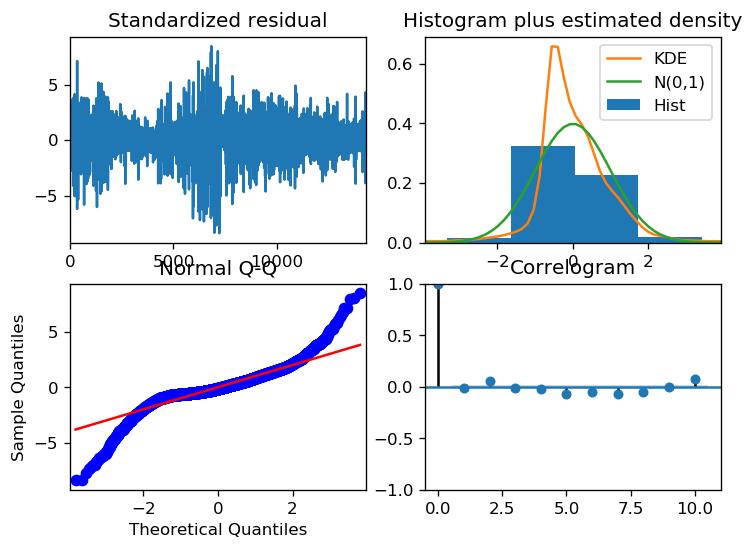

In [95]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

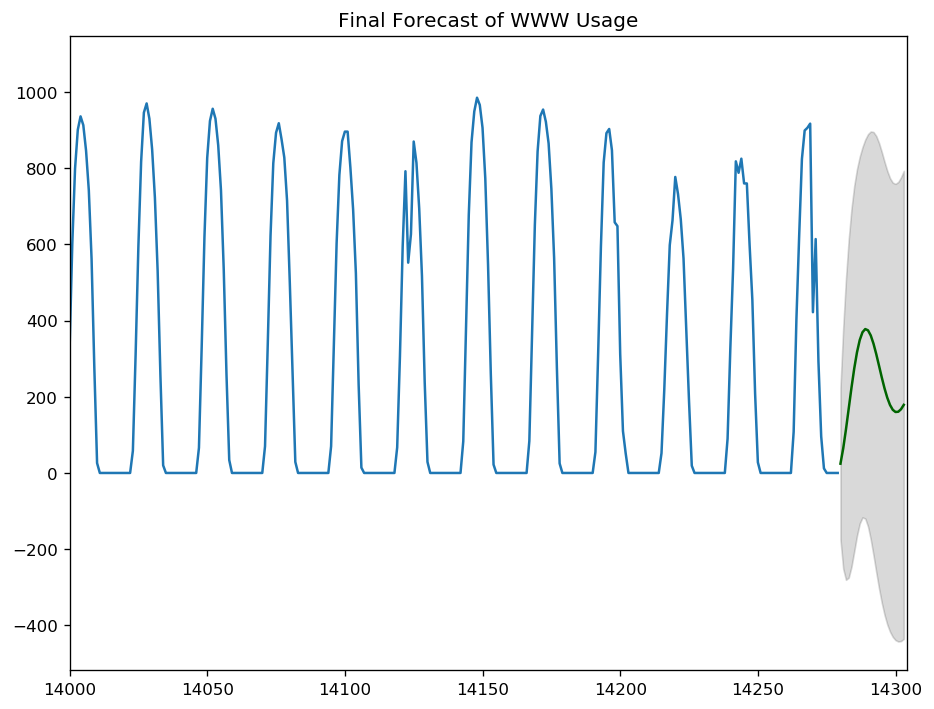

In [102]:
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df), len(df)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.xlim(14000,len(df)+n_periods)
plt.title("Final Forecast of WWW Usage")
plt.show()

***

***

## Test 2

In [216]:
data = plantas.GICIS306.dropna()
data

32544    0.0
32545    0.0
32546    0.0
32547    0.0
32548    0.0
        ... 
46819    0.0
46820    0.0
46821    0.0
46822    0.0
46823    0.0
Name: GICIS306, Length: 14280, dtype: float64

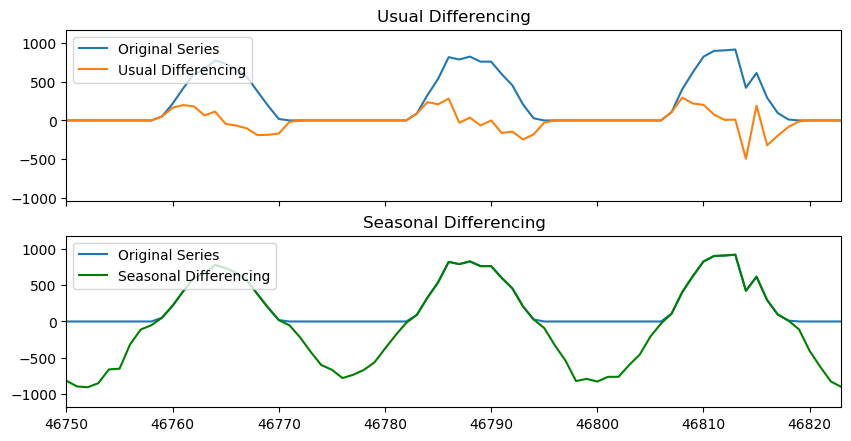

In [118]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.xlim(46750,46823)
plt.show()

In [407]:
data = plantas.GICIS306.dropna()
data = data[13500+24:]
data = np.log(data+1)
data

46068    6.812345
46069    6.779922
46070    6.692084
46071    6.507278
46072    6.098074
           ...   
46819    0.000000
46820    0.000000
46821    0.000000
46822    0.000000
46823    0.000000
Name: GICIS306, Length: 756, dtype: float64

In [247]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel_06 = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=2, max_q=2, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=2056.711, BIC=2079.771, Time=9.621 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=4768.479, BIC=4777.703, Time=0.074 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=-256.148, BIC=-237.700, Time=10.470 seconds
Near non-invertible roots for order (1, 0, 0)(1, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=2955.602, BIC=2974.050, Time=10.549 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=4766.479, BIC=4771.091, Time=0.052 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=2983.332, BIC=3001.780, Time=0.717 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (consta

In [248]:
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  756
Model:             SARIMAX(2, 0, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -3835.654
Date:                                 Sat, 07 Mar 2020   AIC                           7685.308
Time:                                         12:25:21   BIC                           7717.593
Sample:                                              0   HQIC                          7697.753
                                                 - 756                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1104      0.426      0.259      0.796      -0.725       0.945
ar.L1          0.4949      0.016     31.874      0.000       0.464       0.525
ar.L2          0.2336      0.017     13.892      0.000       0.201       0.267
ar.S.L12      -0.9996      0.001   -910.685      0.000      -1.002      -0.997
ma.S.L12      -0.0115      0.232     -0.050      0.960      -0.465       0.442
ma.S.L24      -0.8264      0.018    -45.370      0.000      -0.862      -0.791
sigma2      1600.9451     30.621     52.282      0.000    1540.929    1660.961
===================================================================================
Ljung-Box (Q):                       54.85   Jarque-Bera (JB):             30609.33
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                            -2.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [408]:
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data), len(data)+n_periods)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

In [409]:
data, np.log(fitted_series)

(46068    6.812345
 46069    6.779922
 46070    6.692084
 46071    6.507278
 46072    6.098074
            ...   
 46819    0.000000
 46820    0.000000
 46821    0.000000
 46822    0.000000
 46823    0.000000
 Name: GICIS306, Length: 756, dtype: float64, 756    0.372604
 757    0.915338
 758    1.984060
 759    1.346499
 760    1.577043
 761    1.225176
 762    0.456454
 763    4.340975
 764    5.791182
 765    6.353024
 766    6.665302
 767    6.727423
 768    6.769067
 769    6.753986
 770    6.570773
 771    6.484832
 772    6.068938
 773    5.271661
 774    3.257000
 775    0.636804
 776    0.710821
 777    1.235333
 778    1.267413
 779    1.559679
 dtype: float64)

In [410]:
np.log(fitted_series[7:18])

763    4.340975
764    5.791182
765    6.353024
766    6.665302
767    6.727423
768    6.769067
769    6.753986
770    6.570773
771    6.484832
772    6.068938
773    5.271661
dtype: float64

In [411]:
fitted_series[0:7] = 1
fitted_series[19:] = 1
fitted_series

756      1.000000
757      1.000000
758      1.000000
759      1.000000
760      1.000000
761      1.000000
762      1.000000
763     76.782334
764    327.399869
765    574.226328
766    784.700601
767    834.992561
768    870.499557
769    857.469418
770    713.921793
771    655.128685
772    432.221215
773    194.739177
774     25.971502
775      1.000000
776      1.000000
777      1.000000
778      1.000000
779      1.000000
dtype: float64

In [412]:
data = plantas.GICIS306.dropna()
data = data[13500:]
data = np.log(data+1)

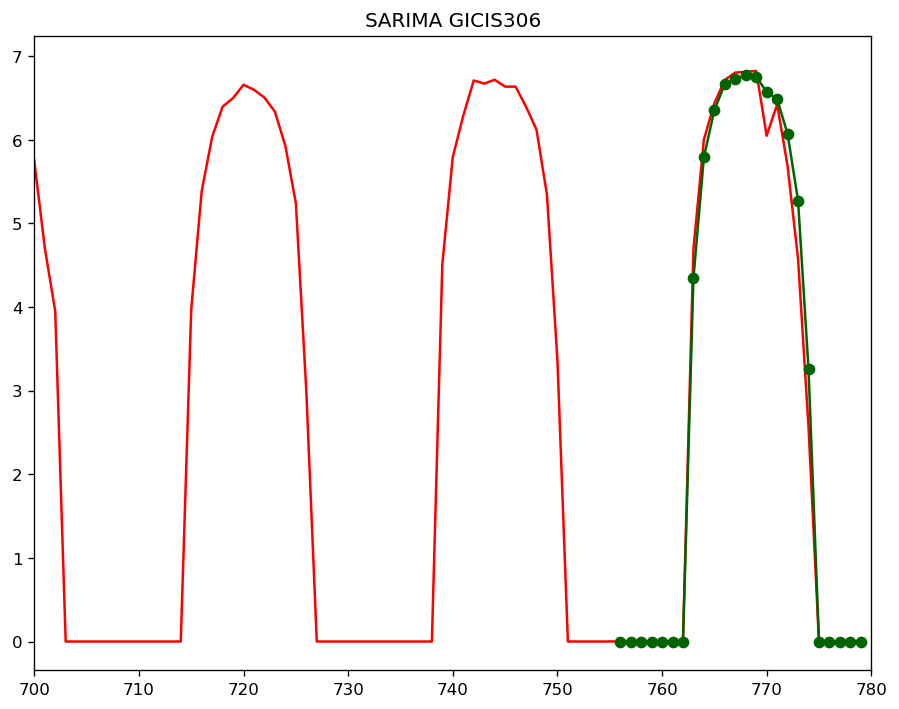

In [413]:
# Plot
data.index = np.arange(0,780)
plt.plot(data,'-',color='r')
plt.plot(np.log(fitted_series),'o-', color='darkgreen')
plt.title("SARIMA GICIS306")
plt.xlim(700,780)
plt.show()

In [414]:
data.index = np.arange(0,len(data))

In [415]:
data = data[-24:]
data.index = np.arange(0,24)
data

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     4.691348
8     6.001415
9     6.434547
10    6.715383
11    6.802395
12    6.810142
13    6.822197
14    6.047372
15    6.421622
16    5.683580
17    4.574711
18    2.564949
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
Name: GICIS306, dtype: float64

In [416]:
fitted_series.index = np.arange(0,24)
fitted_series = np.log(fitted_series)
fitted_series

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     4.340975
8     5.791182
9     6.353024
10    6.665302
11    6.727423
12    6.769067
13    6.753986
14    6.570773
15    6.484832
16    6.068938
17    5.271661
18    3.257000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64

In [423]:
per = (fitted_series-data)/data
per

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7    -0.074685
8    -0.035031
9    -0.012670
10   -0.007458
11   -0.011021
12   -0.006031
13   -0.009999
14    0.086550
15    0.009843
16    0.067802
17    0.152348
18    0.269811
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
dtype: float64

In [424]:
np.mean(per)

0.035788355258181005

In [425]:
per = (np.exp(fitted_series)-np.exp(data))/np.exp(data)
per

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7    -0.295575
8    -0.189604
9    -0.078288
10   -0.048848
11   -0.072230
12   -0.040243
13   -0.065937
14    0.687758
15    0.065250
16    0.470140
17    1.007620
18    0.997808
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64

In [421]:
np.mean(per)

0.10157709883193074